In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
train = pd.read_csv("../data/train.csv")

In [89]:
train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


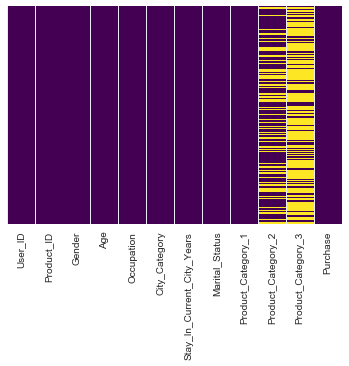

In [91]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


Summary: As we can see, Product category 2 and 3, have null values. We can fill them with 0(our case), because we can assume that these products were not purchased

In [92]:
train = train.fillna(value='0')

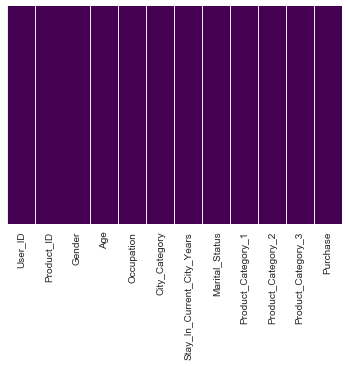

In [93]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [94]:
# age_dict = {'0-17':17, '18-25':25, '26-35':35, '36-45':45, '46-50':50, '51-55':55, '55+':57}
# train["Age"] = train["Age"].apply(lambda line: age_dict[line])

# train["Age"].value_counts().sort_index()

In [95]:
# city_dict = {'A':0, 'B':1, 'C':2}
# train["City_Category"] = train["City_Category"].apply(lambda line: city_dict[line])

# train["City_Category"].value_counts().sort_index()

In [96]:
train = train.replace({'Stay_In_Current_City_Years': {'4+': 4}})


In [97]:
train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4,0,8,0,0,7969


So firstly we will look at the distribution of each feature in the dataset.
Then we can analyse each record vs Purchase Amount as follow:
1. Gender vs purchase 
2. Age vs Purchase 
3. Marital status vs Purchase 
4. Occupation vs Purchase 
6. City vs Purchase
7. Stay in the city years vs purchase 

In final, we can analyze the data based on:
1. Which factors can influence the amount spent on Black Friday?
 * Gender - men or women
 * Marital status - married or unmarried
 * New residents or those with more years lived in the City X.
2. Which Products could be sold during Black Friday?


***Customer***

In [103]:
#Number of Unique users in the dataset
train['User_ID'].nunique() 

#unique by gender
gender = train[['User_ID','Gender']].groupby([ 'Gender']).nunique()
gender

,User_ID,Gender
Gender,,
F,1666,1
M,4225,1


In [99]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4,0,8,0,0,7969


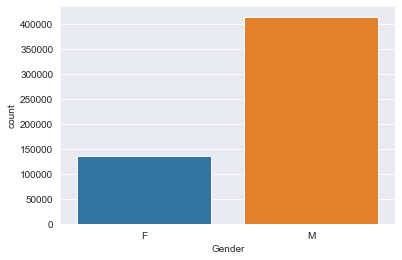

In [100]:
#Distribution of gender
sns.countplot(train.Gender)

# malesPurchaserData = train.loc[train['Gender'] == 'M']
# femalsPurchaserData = train.loc[train['Gender'] == 'F']
# print('Number of males purchaser = ',malesPurchaserData.shape[0])
# print('Number of femals purchaser = ',femalsPurchaserData.shape[0])
# pd.value_counts(train.Gender).unique()

As we can see from the diagram, that ration between men and women could be 1:3, and we can suppose that men are more likely to buy something. But we can take in regard also the amount they spent , because maybe females tends to be less but they can buy expensive things. (Wrong theory)

In [101]:
purchase_gender = train[['Gender','Purchase']].groupby([ 'Gender']).mean()
purchase_gender.sort_values(by=['Purchase'],ascending=False)

,Purchase
Gender,
M,9437.526040
F,8734.565765


In [102]:
sns.set_style('whitegrid')
purchase_gender.plot(kind='bar',color='b')
plt.savefig('../Diagrams/gendervspurchase.png')
 malesPurchaserData = train.loc[train['Gender'] == 'M']
femalsPurchaserData = train.loc[train['Gender'] == 'F']
print('Number of males purchaser = ',malesPurchaserData.shape[0])
print('Number of femals purchaser = ',femalsPurchaserData.shape[0])

IndentationError: unexpected indent (<ipython-input-102-e3ce909a87b3>, line 4)

In [ ]:
#Distribution of marital status
sns.countplot(train.Age, hue = train.Gender)

From the diagram above we can notice, that majority of the buyers are men in the age range between 26-35. In order to make more conclusion out of it, we will analyse the distribution of married ones vs age.

In [ ]:
#Distribution of marital status
sns.countplot(train.Age, hue = train.Marital_Status)

In [ ]:
train[['Marital_Status','Purchase']].groupby([ 'Marital_Status']).sum()

So, as we can observe, there are no one married before 17. And single ones are spending more then the married one. 

Now, we will combine the gender to make  better comparisson.

In [ ]:
train['MarriedOrNor_F_M'] = train.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
print(train['MarriedOrNor_F_M'].unique())


In [ ]:
sns.countplot(train.Age, hue = train.MarriedOrNor_F_M)
plt.savefig('age-marital.png')

Just to remeber 0 is F and 1 is Male. 
Again, there are more married males that shop, but here we can imply different cases, as the husband pays for their spouse, but we don't have so much information about the products bought by them so it will be no need to analyse further this case.

In [ ]:
purchase_age = train[['Age','Purchase']].groupby([ 'Age']).sum()
purchase_age.sort_values(by=['Purchase'],ascending=False)
sns.set_style('darkgrid')
purchase_age.plot(kind='bar',color='b')
plt.savefig('Models train/agepurch.png')

In [ ]:
purchase_marital = train[['MarriedOrNor_F_M','Purchase']].groupby([ 'MarriedOrNor_F_M']).sum()
purchase_marital.sort_values(by=['Purchase'],ascending=False)
sns.set_style('darkgrid')
purchase_marital.plot(kind='bar',color='b')
plt.savefig('../Diagrams/marital.png')

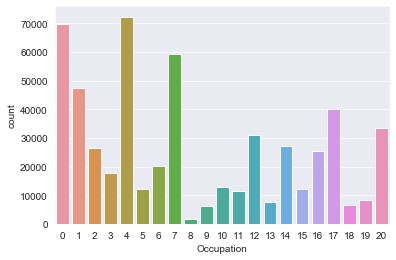

In [104]:
#Distribution of occupation
sns.countplot(train.Occupation)

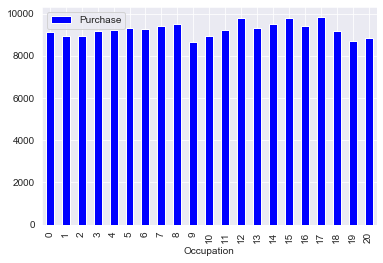

In [107]:
purchase_occu = train[['Occupation','Purchase']].groupby([ 'Occupation']).mean()
purchase_occu.sort_values(by=['Purchase'],ascending=False)
sns.set_style('darkgrid')
purchase_occu.plot(kind='bar',color='b')
plt.savefig('../Diagrams/ocuvspurch-perhead.png')

The  demographic  information  presented  by  the data  contains  the  occupation  of  the  client  witch  is represented as a number from 0 to 20. The real meaning of this number is only known by the ABC Private Limited retail shop. During  this  part  of  the  analysis  we  tried  to  see if  people  tend  to  shop  more  or  less  based  on  their occupation category.

Note: We can observe,  that the ratio between the number of customers with occupation x is the normal distributed with purchase spent. In the end, occupations with the highest representations will have the highest amounts of purchases.

***Product type***

The most 10 sold products. We can assume that also these 10 top products will eb sold during Black Friday, if they are so popular among customers.

In [ ]:
#Total products
len(train['Product_ID'].value_counts())

In [ ]:
train['Product_ID'].value_counts().head(10)

***City***

In [ ]:
sns.countplot(train.City_Category)

We can suppose that City Category A is the biggest and has more customers but do the customers spent also more in that city?
Above we will make the comparison between city category and Purchase amount.

In [ ]:
city_category = train[['City_Category','Purchase']].groupby([ 'City_Category']).sum()
city_category.sort_values(by=['Purchase'],ascending=False)

In [ ]:
sns.set_style('darkgrid')
city_category.plot(kind='bar',color='b')
plt.savefig('Models train/citycategory.png')

we can see that buyers from city category B spend more, followed by City category C and then A.

In [ ]:
sns.countplot(train.Stay_In_Current_City_Years)

So from this diagram we can conclude that new residences tend to buy more things, we can assume that they will take the advantage of the dicount on Black Friday to purchase all the things needed for new place.

Now lets see if these has an affect on purchase amount?

In [ ]:
Stay_City = train[['Stay_In_Current_City_Years','Purchase']].groupby([ 'Stay_In_Current_City_Years']).sum()
Stay_City.sort_values(by=['Purchase'],ascending=False)

In [ ]:
sns.set_style('darkgrid')
Stay_City.plot(kind='bar',color='b')
plt.savefig('../Diagrams/stayyears.png')

We can observe, that customers that tends to spend more are likely to be new residents.